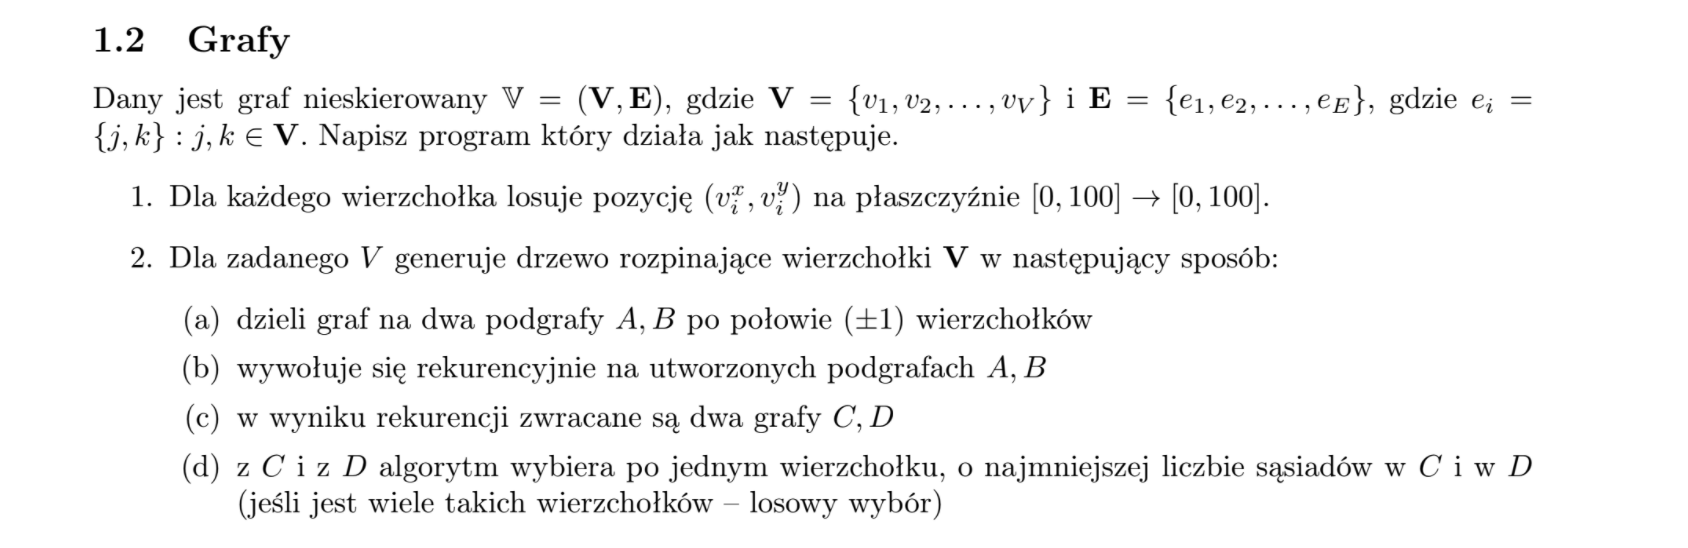

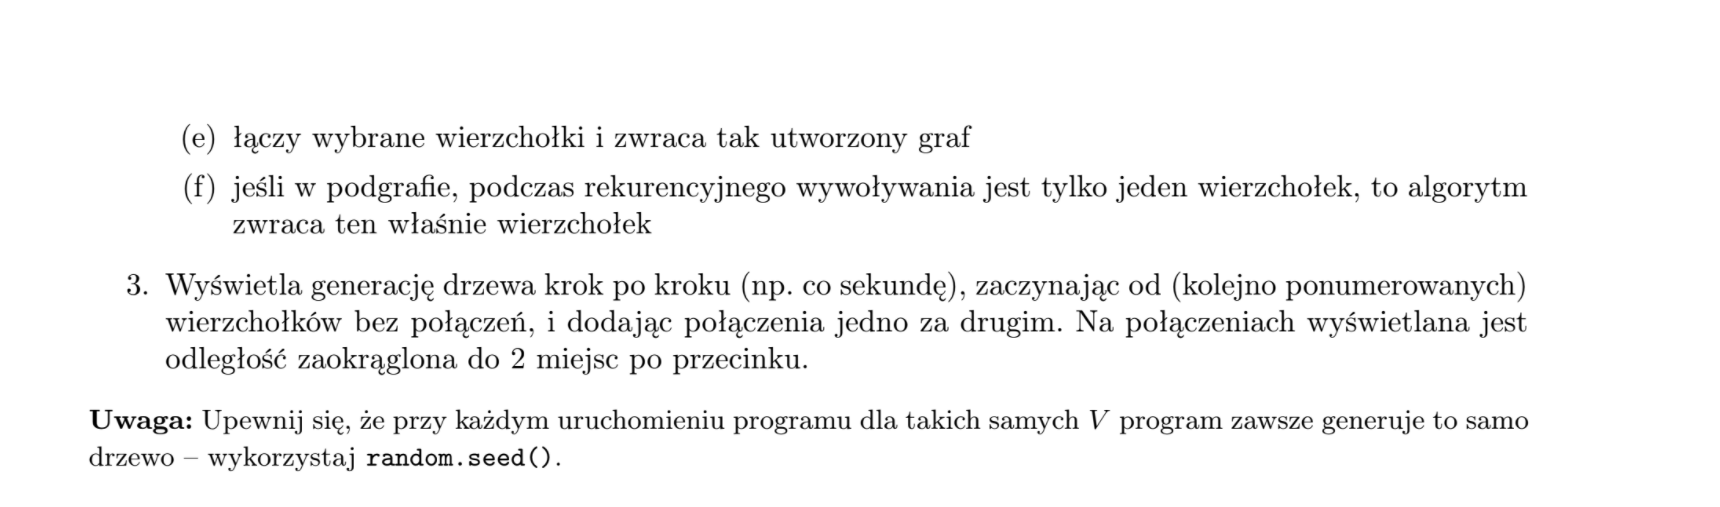

In [2]:
from IPython.display import Image, display

x = Image('pictures/1_2.png', height=300)
y = Image('pictures/1_2_b.png', height=300)

display(x)
display(y)

In [1]:
import networkx as nx
import numpy as np
from math import sqrt
from time import sleep
import matplotlib.pyplot as plt

In [2]:
# ilość wierzchołków
n = 20

In [3]:
# losowanie pozycji z przedziałów [0, 100], [0, 100]
V_pos = list()
for i in range(n):
    V_pos.append(np.random.randint(0, 100, 2))

In [4]:
# sortowanie wierzchołków według pozycji x - układ numeracji będzie miał wtedy więcej sensu
V_pos = sorted(V_pos, key=lambda x: x[0])

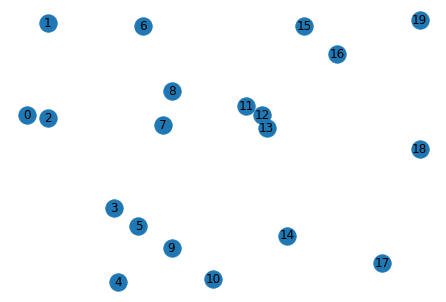

In [5]:
G = nx.Graph()
V = np.arange(n)
G.add_nodes_from(V)
nx.draw(G, pos=V_pos, with_labels=True)

Treść zadanie można interpretować na rózne sposoby:
1. Program kończy działanie i pozostawia dwa grafy które są drzewami rozpinającymi. W treści nie jest wyraźnie napisane czy algorytm ma dodać jeszcze jedno połączenie ostatecznych grafów A i B. Połączenia między krawędziami mają być dodawane po podziale na podgrafy C, D.
2. Ma zostać utworzone drzewo rozpinające - więc musimy dodać krawędź między dwoma końcowymi grafami A i B. Aby spełnić wymaganie tej interpretacji wystarczy dodać tylko jeden warunek w kodzie aby na koniec dodać jeszcze jedną krawędź.

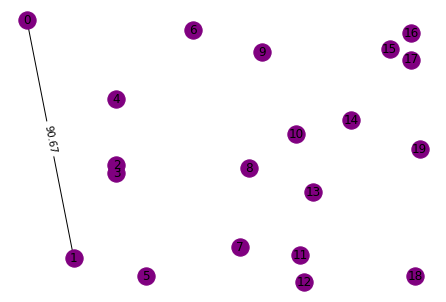

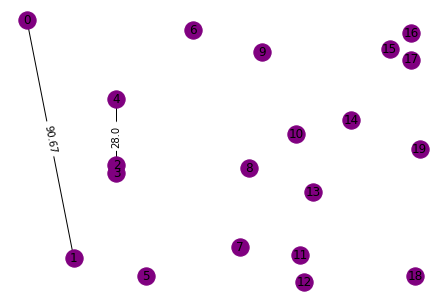

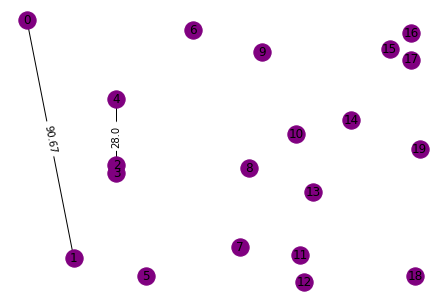

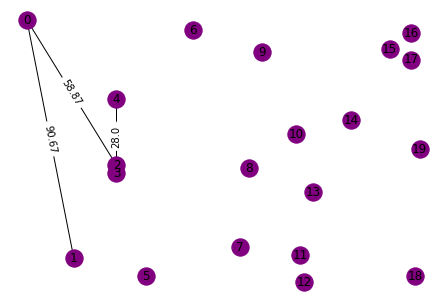

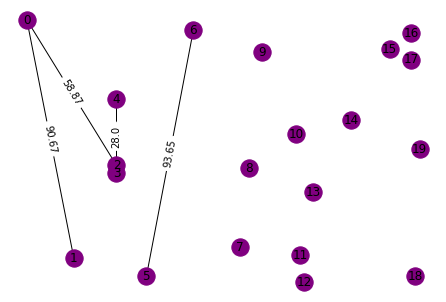

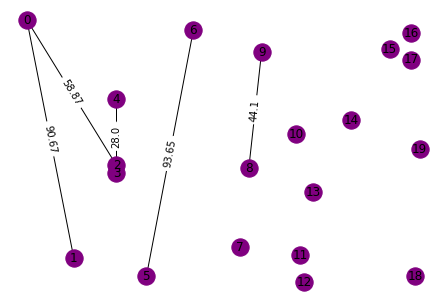

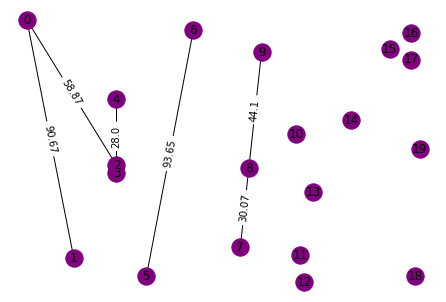

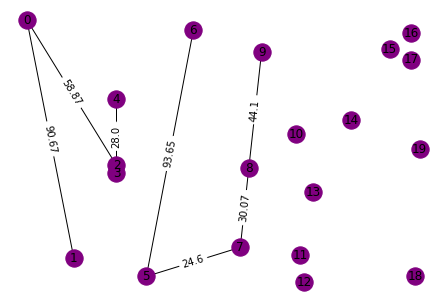

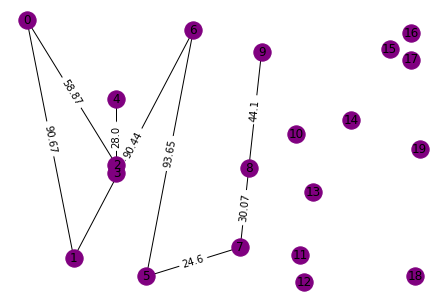

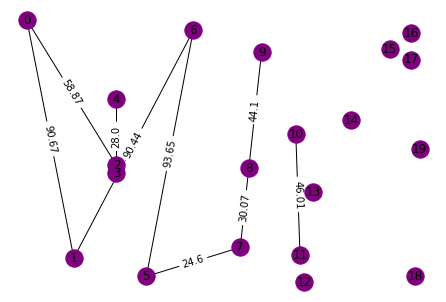

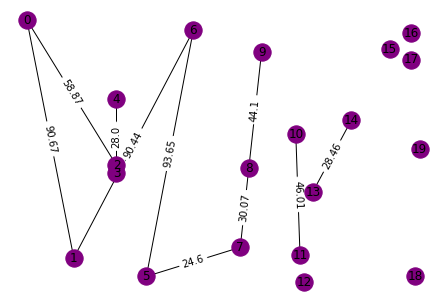

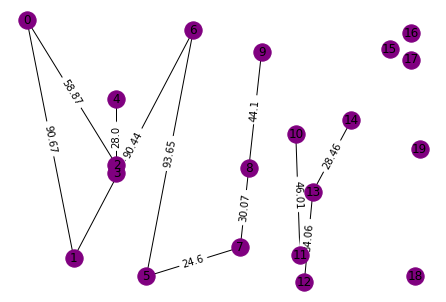

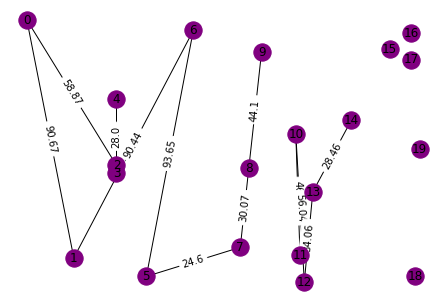

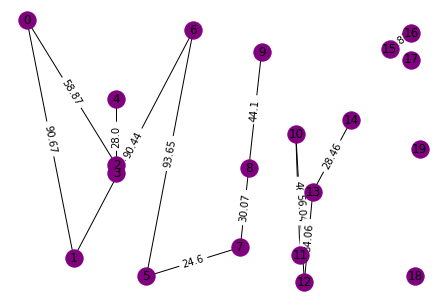

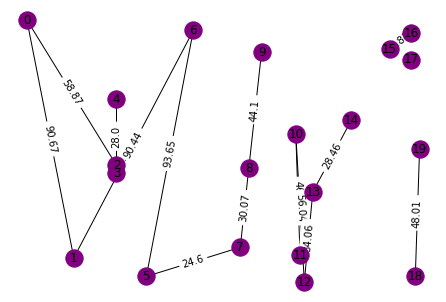

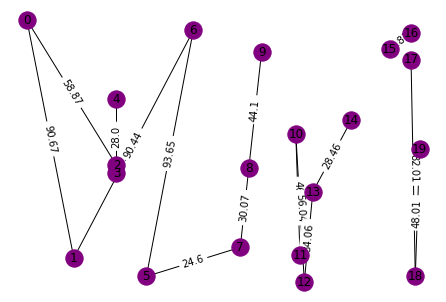

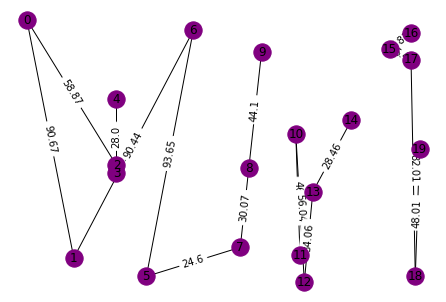

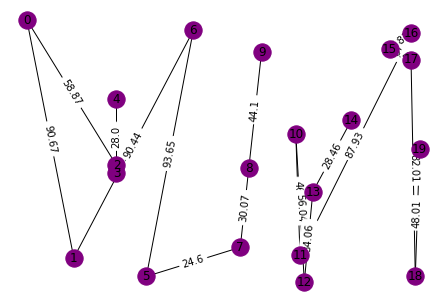

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [6]:
# interpretacja 1

def euclides(a, b):
    """
    Funkcja oblicza odległość euklidesową między dwoma wierzchołkami

    :param list a: wzpórzędne wierzchołka a [x, y]
    :param list b: wzpórzędne wierzchołka b [x, y]
    :return float: odległość euklidesowa między dwoma wierzchołkami zaokrąglona do 2  miejsc po przecinku
    """
    return round(sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2), 2)


def least_neighbor(g, nodes):
    """
    Funkcja wyznacza wierzchołek o najmniejszej liczbie sąsiadów

    :param g: graf dla którego działa algorytm
    :param list nodes: lista wierzchołków podgrafu
    :return int: wierzchołek o najmniejszej liczbie sąsiadów
    """
    node = None
    min_nei = float('+inf')
    for n in nodes:
        if len(list(g.neighbors(n))) < min_nei:
            min_nei = len(list(g.neighbors(n)))
            node = n

    return node

def plot_graph(g):
    """
    Funkcja wyświetlająca graf

    :param g: graf 
    :return: None
    """
    nx.draw(g, pos=V_pos, with_labels=True, node_color='purple')
    edge_labels = nx.get_edge_attributes(g, 'length')
    nx.draw_networkx_edge_labels(g, pos=V_pos, edge_labels=edge_labels)
    plt.show()


def split_graph(g, nodes):
    """
    Funkcja przeporwadzająca algorytm podziału na 2 grafy i utworzenia drzewa rozpinającego

    :param nx.Graph g: graf na którym stosujemy algorytm
    :param list nodes: lista wierzchołków grafu
    :return a_nodes, b_nodes: dwie listy z wierzchołkami podgrafu
    """
    # sprawdzenie możliwości podziału na 2 podgrafy A, B
    if len(nodes) > 2:
        # podzial na wierzchołki A i B
        a_nodes = nodes[0:len(nodes)//2]
        b_nodes = nodes[len(nodes)//2:]

        # sprawdzenie możliwości podziału na 2 podgrafy C, D
        if len(a_nodes) >= 2:
            # rekurencyjne wywołanie funkcji
            ac, ad = split_graph(g, a_nodes)
            
            # wierzchołki o najmniejszej liczbie sąsiadów
            v1 = least_neighbor(g, ac)
            v2 = least_neighbor(g, ad)
            dist = euclides(V_pos[v1], V_pos[v2])
            # dodanie krawędzi do grafu
            g.add_edge(v1, v2, length=dist)

            # wyświetlenie kolejnego etapu na grafie
            sleep(.5)
            plot_graph(g)

        # sprawdzenie możliwości podziału na 2 podgrafy C, D    
        if len(b_nodes) >= 2:
            # rekurencyjne wywołanie funkcji
            bc, bd = split_graph(g, b_nodes)
            # wierzchołki o najmniejszej liczbie sąsiadów
            v1 = least_neighbor(g, bc)
            v2 = least_neighbor(g, bd)
            dist = euclides(V_pos[v1], V_pos[v2])
            # dodanie krawędzi do grafu
            g.add_edge(v1, v2, length=dist)
        
            # wyświetlenie kolejnego etapu na grafie
            sleep(.5)
            plot_graph(g)
            
        return a_nodes, b_nodes
            
    else:
        return nodes[:1], nodes[1:]


split_graph(G, list(G.nodes))

Treść zadanie można interpretować na rózne sposoby:
1. Tak jak powyżej program kończy działanie i pozostawia dwa grafy które są drzewami rozpinającymi. W treści nie jest wyraźnie napisane czy algorytm ma dodać jeszcze jedno połączenie ostatecznych grafów A i B. Połączenia między krawędziami mają być dodawane po podziale na podgrafy C, D.
2. Ma zostać utworzone drzewo rozpinające - więc musimy dodać krawędź między dwoma końcowymi grafami A i B. Aby spełnić wymaganie tej interpretacji wystarczy dodać tylko jeden warunek w kodzie.

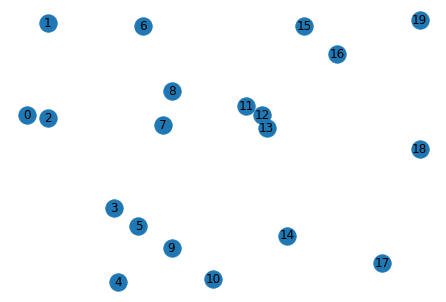

In [8]:
# Tworzymy ponownie graf żeby 'zrestartować' połączenia
# number of nodes
n = 20
G = nx.Graph()
V = np.arange(n)
G.add_nodes_from(V)
nx.draw(G, pos=V_pos, with_labels=True)

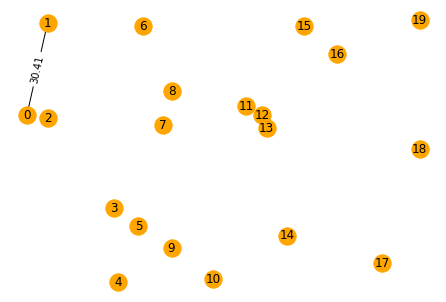

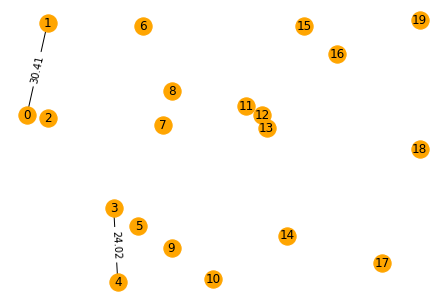

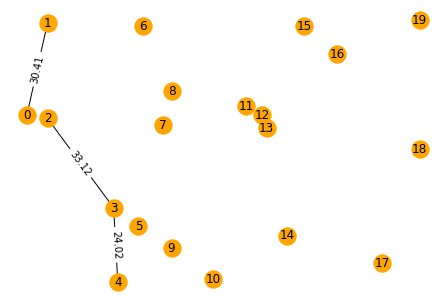

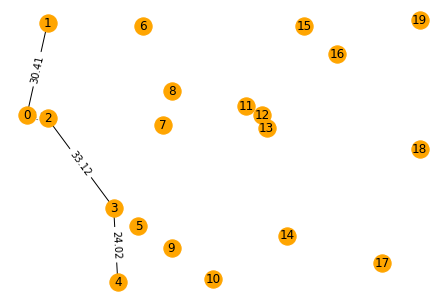

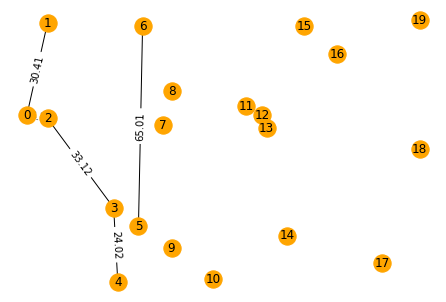

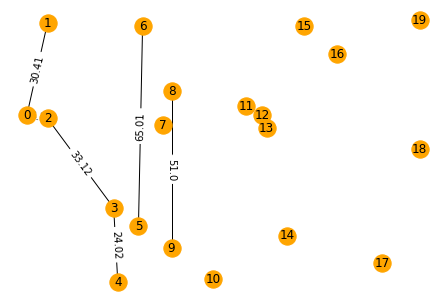

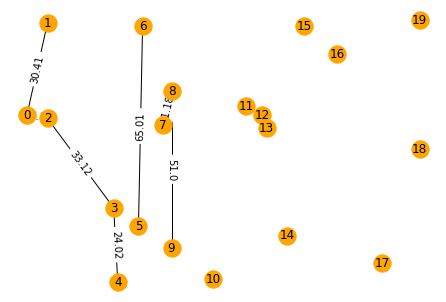

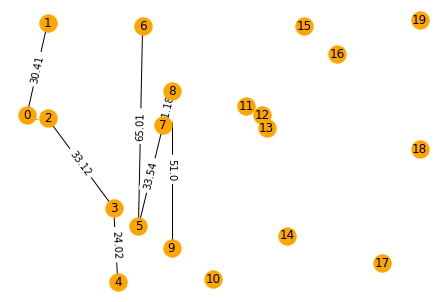

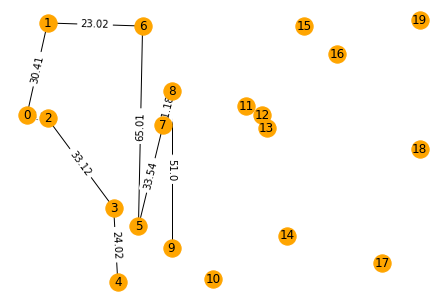

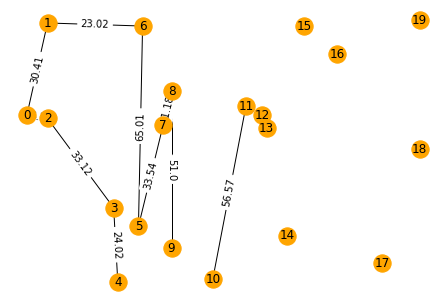

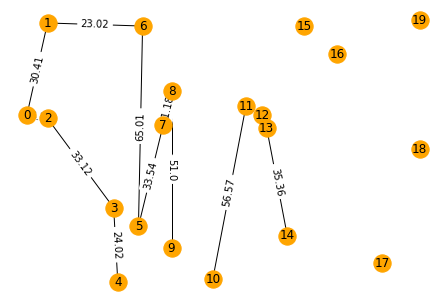

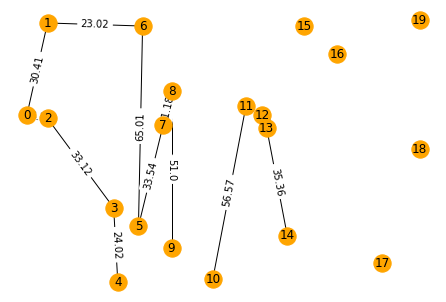

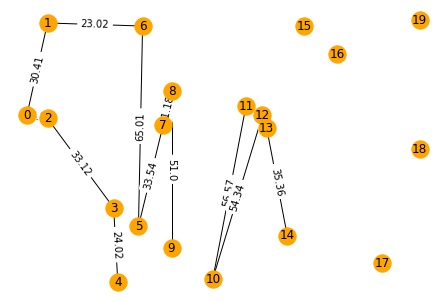

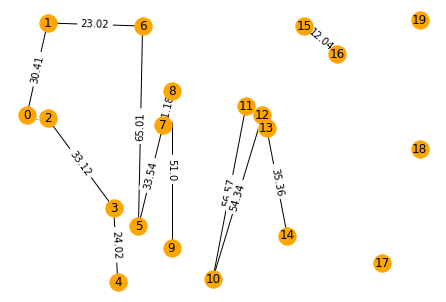

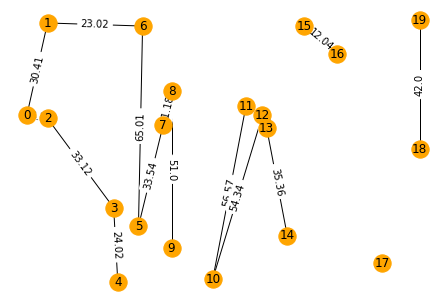

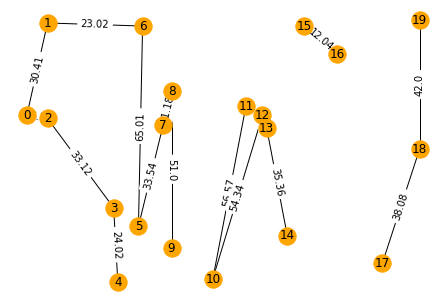

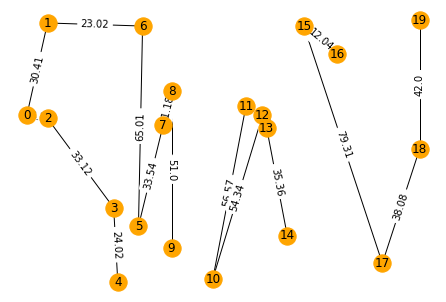

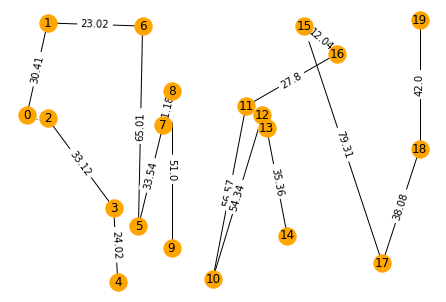

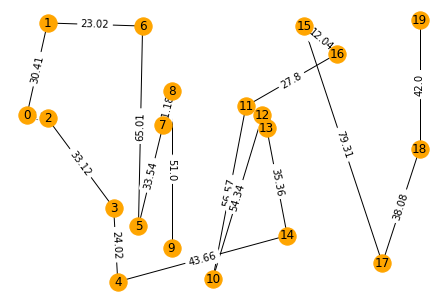

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [9]:
# interpretacja 2 - na koniec łączymy dwa podgrafy

def euclides(a, b):
    """
    Funkcja oblicza odległość euklidesową między dwoma wierzchołkami

    :param list a: wzpórzędne wierzchołka a [x, y]
    :param list b: wzpórzędne wierzchołka b [x, y]
    :return float: odległość euklidesowa między dwoma wierzchołkami zaokrąglona do 2  miejsc po przecinku
    """
    return round(sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2), 2)


def least_neighbor(g, nodes):
    """
    Funkcja wyznacza wierzchołek o najmniejszej liczbie sąsiadów

    :param g: graf dla którego działa algorytm
    :param list nodes: lista wierzchołków podgrafu
    :return int: wierzchołek o najmniejszej liczbie sąsiadów
    """
    node = None
    min_nei = float('+inf')
    for n in nodes:
        if len(list(g.neighbors(n))) < min_nei:
            min_nei = len(list(g.neighbors(n)))
            node = n

    return node

def plot_graph(g):
    """
    Funkcja wyświetlająca graf

    :param g: graf 
    :return: None
    """
    nx.draw(g, pos=V_pos, with_labels=True, node_color='orange')
    edge_labels = nx.get_edge_attributes(g, 'length')
    nx.draw_networkx_edge_labels(g, pos=V_pos, edge_labels=edge_labels)
    plt.show()


def split_graph(g, nodes):
    """
    Funkcja przeporwadzająca algorytm podziału na 2 grafy i utworzenia drzewa rozpinającego

    :param nx.Graph g: graf na którym stosujemy algorytm
    :param list nodes: lista wierzchołków grafu
    :return a_nodes, b_nodes: dwie listy z wierzchołkami podgrafu
    """
    # sprawdzenie możliwości podziału na 2 podgrafy A, B
    if len(nodes) > 2:
        # podzial na wierzchołki A i B
        a_nodes = nodes[0:len(nodes)//2]
        b_nodes = nodes[len(nodes)//2:]

        # sprawdzenie możliwości podziału na 2 podgrafy C, D
        if len(a_nodes) >= 2:
            # rekurencyjne wywołanie funkcji
            ac, ad = split_graph(g, a_nodes)
            
            # wierzchołki o najmniejszej liczbie sąsiadów
            v1 = least_neighbor(g, ac)
            v2 = least_neighbor(g, ad)
            dist = euclides(V_pos[v1], V_pos[v2])
            # dodanie krawędzi do grafu
            g.add_edge(v1, v2, length=dist)

            # wyświetlenie kolejnego etapu na grafie
            sleep(.5)
            plot_graph(g)

        # sprawdzenie możliwości podziału na 2 podgrafy C, D    
        if len(b_nodes) >= 2:
            # rekurencyjne wywołanie funkcji
            bc, bd = split_graph(g, b_nodes)
            # wierzchołki o najmniejszej liczbie sąsiadów
            v1 = least_neighbor(g, bc)
            v2 = least_neighbor(g, bd)
            dist = euclides(V_pos[v1], V_pos[v2])
            # dodanie krawędzi do grafu
            g.add_edge(v1, v2, length=dist)
        
            # wyświetlenie kolejnego etapu na grafie
            sleep(.5)
            plot_graph(g)
            
        
        # warunek wykonujący ostatnie połączenie na grafie 
        if len(a_nodes) >= len(list(g.nodes))/2:
            # wierzchołki o najmniejszej liczbie sąsiadów
            v1 = least_neighbor(g, a_nodes)
            v2 = least_neighbor(g, b_nodes)
            dist = euclides(V_pos[v1], V_pos[v2])
            # dodanie krawędzi do grafu
            g.add_edge(v1, v2, length=dist)
            
            # wyświetlenie kolejnego etapu na grafie
            sleep(.5)
            plot_graph(g)
            
        return a_nodes, b_nodes
            
    else:
        return nodes[:1], nodes[1:]

split_graph(G, list(G.nodes))